In [3]:
# 1. Import Library
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# 2. Load Dataset
df = pd.read_csv("traffic_jam_dataset.csv")

In [5]:
# 3. Membership Function
def kendaraan_sedikit(x):
    if x <= 120:
        return 1
    elif 120 < x <= 140:
        return (140 - x) / (140 - 120)
    else:
        return 0

def kendaraan_sedang(x):
    if 120 < x <= 140:
        return (x - 120) / (140 - 120)
    elif 140 < x <= 180:
        return 1
    elif 180 < x <= 200:
        return (200 - x) / (200 - 180)
    else:
        return 0

def kendaraan_banyak(x):
    if 180 < x <= 200:
        return (x - 180) / (200 - 180)
    elif 200 < x <= 260:
        return 1
    elif 260 < x <= 280:
        return (280 - x) / (280 - 260)
    else:
        return 0

def kecepatan_lancar(v):
    if v >= 45:
        return 1
    elif 35 <= v < 45:
        return (v - 35) / (45 - 35)
    else:
        return 0

def kecepatan_macet(v):
    if v <= 10:
        return 1
    elif 10 < v <= 20:
        return (20 - v) / (20 - 10)
    else:
        return 0

def kecepatan_padat(v):
    if 20 < v <= 35:
        return (v - 20) / (35 - 20)
    elif 35 < v <= 40:
        return 1
    else:
        return 0

In [6]:
# 4. Generate Fuzzy Output (Insight Kolom Baru)
def status_kemacetan(row):
    # Mengambil maksimum dari masing-masing fuzzy logic
    macet_score = max(kendaraan_banyak(row['Kendaraan']), kecepatan_macet(row['Kecepatan']))
    padat_score = max(kendaraan_sedang(row['Kendaraan']), kecepatan_padat(row['Kecepatan']))
    lancar_score = max(kendaraan_sedikit(row['Kendaraan']), kecepatan_lancar(row['Kecepatan']))
    # Menentukan status akhir
    if macet_score >= padat_score and macet_score >= lancar_score:
        return "Macet"
    elif padat_score >= macet_score and padat_score >= lancar_score:
        return "Padat"
    else:
        return "Lancar"

df['Status'] = df.apply(status_kemacetan, axis=1)


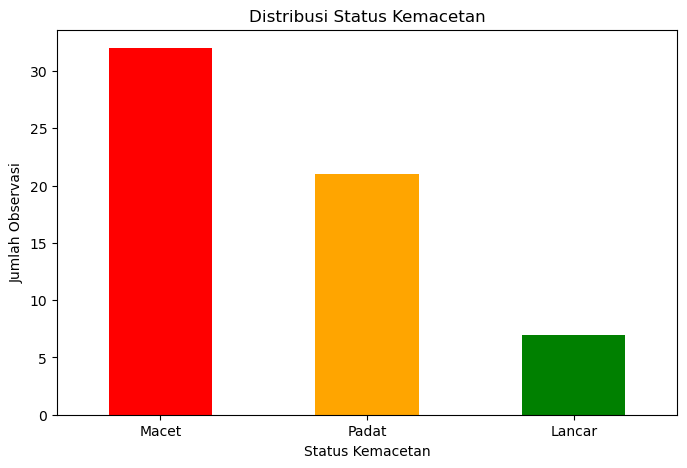

In [7]:
# 5. Plot Distribusi Status Kemacetan
plt.figure(figsize=(8,5))
df['Status'].value_counts().plot(kind='bar', color=['red','orange','green'])
plt.title("Distribusi Status Kemacetan")
plt.xlabel("Status Kemacetan")
plt.ylabel("Jumlah Observasi")
plt.xticks(rotation=0)
plt.show()

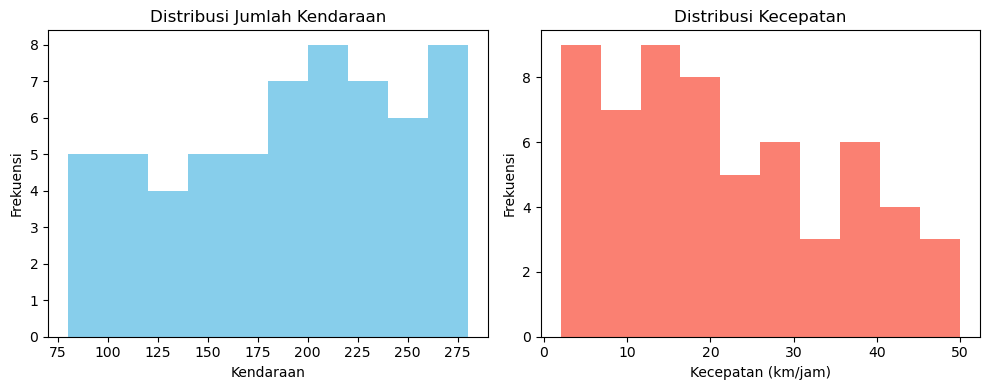

In [8]:
# 6. Plot Distribusi Jumlah Kendaraan & Kecepatan
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['Kendaraan'], bins=10, color='skyblue')
plt.title("Distribusi Jumlah Kendaraan")
plt.xlabel("Kendaraan")
plt.ylabel("Frekuensi")

plt.subplot(1,2,2)
plt.hist(df['Kecepatan'], bins=10, color='salmon')
plt.title("Distribusi Kecepatan")
plt.xlabel("Kecepatan (km/jam)")
plt.ylabel("Frekuensi")

plt.tight_layout()
plt.show()

In [9]:
# 7. Simpan hasil insight ke file baru (opsional)
df.to_csv("traffic_jam_with_status.csv", index=False)

In [10]:
with open('requirements.txt', 'w') as f:
    f.write('pandas\nmatplotlib\nnumpy\n')